## CALIFORNIA HOUSING EDA

### Introduction

#### Features of the California Dataset

- longitude : A measure of how far west a house is; a higher value is farther west.
- latitude : A measure of how far north a house is; a higher value is farther north.
- housing_median_age : Median age of a house within a block; a lower number is a newer building.
- total_rooms : Total number of rooms within a block.
- total_bedrooms : Total number of bedrooms within a block.
- population : ITotal number of people residing within a block.
- households : Total number of households, a group of people residing within a home unit, for a block.
- median_income : Median income for households within a block of houses (measured in tens of thousands of US Dollars).
- median_house_value : Median house value for households within a block (measured in US Dollars).
- oceanProximity: Location of the house w.r.t ocean/sea

In [1]:
# We have install all the necessary python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/chetan/Desktop/PROJECTS/CALIFORNIA_HOUSING/california_housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#By checking this we got to know that total_bedrooms column has null values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#We got to know there are 207 null values in bedrooms.

df[df['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [6]:
# To know the Statistical Summary Of the Data Set.

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##### 1. What is the average median income of the data set and check the distribution of data using appropriate plots. Please explain the distribution of the plot.

In [7]:
#By Applying .mean() function will get the mean value of [median_income] column.

m = df['median_income'].mean()
print('The Average Median Income IS',m)

The Average Median Income IS 3.8706710029070246


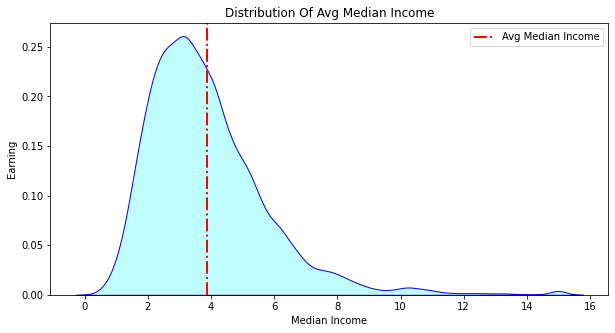

In [8]:
#As the there too many values for the ditribution, the best plot here is KDE to display the distribution

plt.figure(figsize = (10,5))
sns.kdeplot( x= df['median_income'], fill = True, color = 'cyan', edgecolor = 'blue')
plt.axvline(x=m, linewidth = 2 , color = 'red', linestyle = '-.' , label = 'Avg Median Income')
plt.title('Distribution Of Avg Median Income')
plt.xlabel('Median Income')
plt.ylabel('Earning')
plt.legend()
plt.show()

Explanation - **After observing the dataset closely, I discovered that it is skewed in the right side. The best suitable plot which shows the distribution of median income is Kernel Density Estimate as it depicts the probability density at different values in a continuous variable**

In [9]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


##### 2. Draw an appropriate plot to see the distribution of housing_median_age and explain your observations.

In [10]:
#By Value Count we get the count of unique values.

df['housing_median_age'].value_counts().sort_index().to_frame().head()

,housing_median_age
1.0,4
2.0,58
3.0,62
4.0,191
5.0,244


In [11]:
#By Applying .mean() function will get the mean value of [housing_median_age] column.

n = df['housing_median_age'].mean()
print('The Average Housing Median Age IS',n)
     

The Average Housing Median Age IS 28.639486434108527


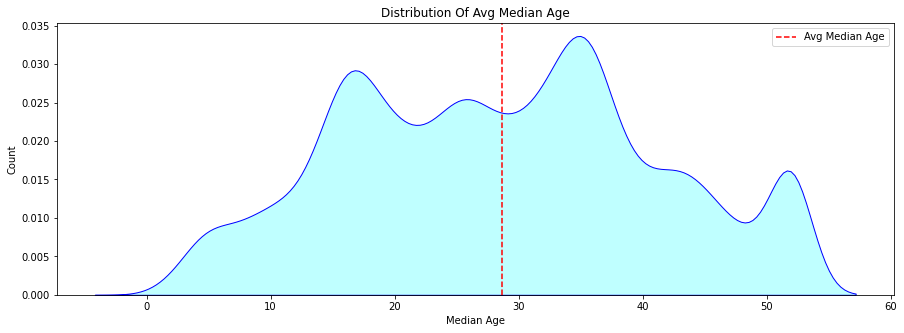

In [12]:
#As the there too many values for the ditribution, the best plot here is KDE to display the distribution

plt.figure(figsize = (15,5))
sns.kdeplot( x= df['housing_median_age'], fill = True, color = 'cyan', edgecolor = 'blue')
plt.axvline(x = n , linestyle = '--', color = 'red',label = 'Avg Median Age')
plt.title('Distribution Of Avg Median Age')
plt.xlabel('Median Age')
plt.ylabel('Count')
plt.legend()
plt.show()

Explanation - **After observing the dataset closely, I discovered that it is slightly skewed in the left side. The best suitable plot which shows the distribution of housing median age is Kernel Density Estimate As we can clearly see that between age 35-40 density is at peak. It depicts the probability density at different values in a continuous variable**

In [13]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


##### 3. Show with the help of visualization, how median_income and median_house_values are related?

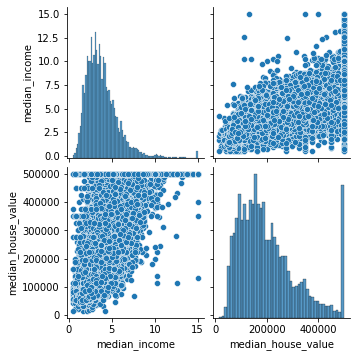

<Figure size 720x720 with 0 Axes>

In [14]:
# We are using Pair Plot to get the co-relation between [median_income] and [median_house] columns

sns.pairplot(df[['median_income','median_house_value']])
plt.figure(figsize = (10,10))
plt.show()
     

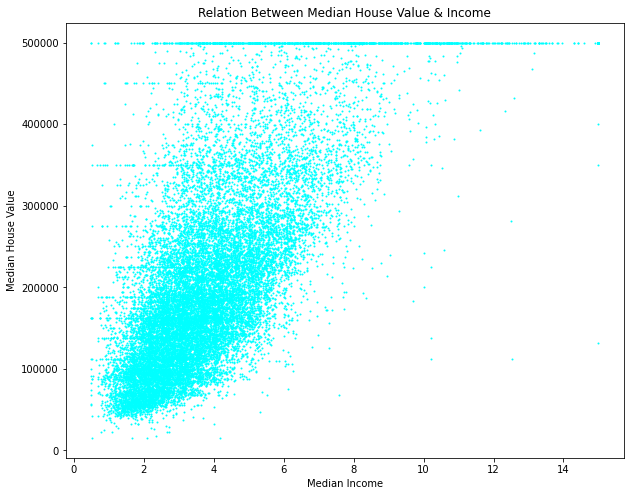

In [15]:
#For an alternate option we can also use Scatter Plot to display the co-relation.

plt.figure(figsize = (10,8))
plt.scatter(x = df['median_income'], y = df['median_house_value'], s = 1 , c = 'pink', marker = 'o', linewidth = 1, edgecolor = 'cyan')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Relation Between Median House Value & Income')
plt.show()

Explanation - **After observing the dataset closely, I observed that it is positively correlated as it is directly proprotion. The best suitable plot which shows the distribution of housing median age is pairplot and scatter plot. As Scatter plots are widely used to represent relation among variables and how change in one affects the other. It clearly shows the linear relation between Median Income and House Value**

##### 4. Create a data set by deleting the corresponding examples from the data set for which total_bedrooms are not available.



In [16]:
#Finding the missing values by .isna() function.

missing_values = df[df['total_bedrooms'].isna()]

In [17]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [18]:
#Creating Another dataset df1 , in which we are removing the missing values of df dataset.

df1 = df.dropna(subset = ["total_bedrooms"])

In [19]:
df1['total_bedrooms'].isna().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


##### 5. Create a data set by filling the missing data with the mean value of the total_bedrooms in the original data set.



In [21]:
# Finding the mean value of the [total_bedrooms] column.

total_bedrooms_mean = df['total_bedrooms'].mean()
print('The Mean of Total Bedrooms is ',total_bedrooms_mean)

The Mean of Total Bedrooms is  537.8705525375618


In [22]:
#Filling the above mean value to the missing data.

df['total_bedrooms'].fillna(total_bedrooms_mean, inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [24]:
df['total_bedrooms'].value_counts().to_frame().reset_index()


,index,total_bedrooms
0,537.870553,207
1,280.000000,55
2,331.000000,51
3,345.000000,50
4,343.000000,49
...,...,...
1919,1874.000000,1
1920,1243.000000,1
1921,2009.000000,1
1922,4585.000000,1


##### 6. Write a programming construct (create a user defined function) to calculate the median value of the data set wherever required.

In [25]:
#Creating a User defined function calculate_median to get the median value of any numerical column.

def calculate_median(dataset, column):
  return dataset[column].median()

In [26]:
calculate_median(df,'housing_median_age')


29.0

In [27]:
calculate_median(df,'total_rooms')

2127.0

##### 7. Plot latitude versus longitude and explain your observations.



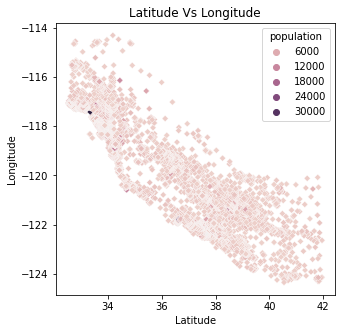

In [29]:
#As there are very minute details available, we have taken Scatter plot for the Comparison.

plt.figure(figsize =(5,5))
sns.scatterplot(x =df['latitude'] ,y =df['longitude'],hue = df['population'] ,marker = 'D' ,s= 20 )
plt.xlabel('Latitude', fontsize = 10)
plt.ylabel('Longitude', fontsize = 10)
plt.title('Latitude Vs Longitude')
plt.show()

##### We Can Even observe the california map to get more details about the population.



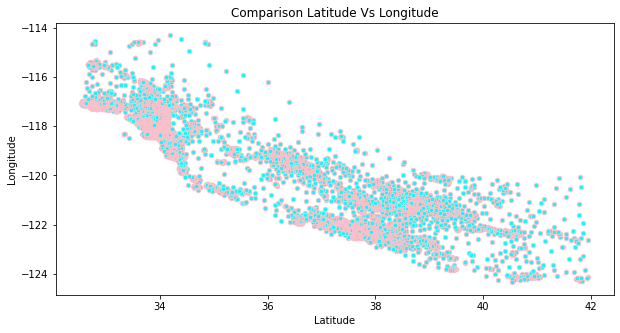

In [31]:
# Same plot by Matplotlib library

plt.figure(figsize =(10,5))
plt.scatter(x = df['latitude'] ,y= df['longitude'] ,s=20 ,c= 'cyan', marker = 'o',edgecolor = 'pink' )
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Comparison Latitude Vs Longitude')
plt.show()

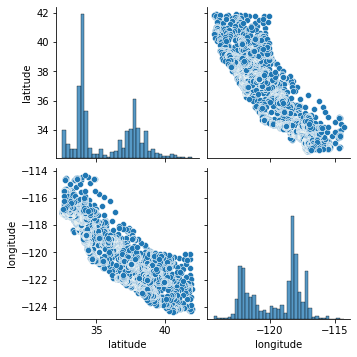

In [32]:
sns.pairplot(df[['latitude','longitude']])
plt.show()

Explanation - **After observing the dataset closely, I observed that it is negatively correlated as it is inversely proportion. The best suitable plot which shows the distribution of Latitude versus longitude is pairplot and scatter plot. As Scatter plots are widely used to represent relation among variables and how change in one affects the other.**

##### 8. Create a data set for which the ocean_proximity is ‘Near ocean’.

In [37]:
#Create a df3 dataset where we are only consideing Near Ocean from Ocean_Proximity categorical column.

df3 = df[df['ocean_proximity']=='NEAR OCEAN']
df3

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16.0,2739.0,480.0,1259.0,436.0,3.7557,109400.0,NEAR OCEAN
1851,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,NEAR OCEAN
1852,-124.23,41.75,11.0,3159.0,616.0,1343.0,479.0,2.4805,73200.0,NEAR OCEAN
1853,-124.21,41.77,17.0,3461.0,722.0,1947.0,647.0,2.5795,68400.0,NEAR OCEAN
1854,-124.19,41.78,15.0,3140.0,714.0,1645.0,640.0,1.6654,74600.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
20380,-118.83,34.14,16.0,1316.0,194.0,450.0,173.0,10.1597,500001.0,NEAR OCEAN
20381,-118.83,34.14,16.0,1956.0,312.0,671.0,319.0,6.4001,321800.0,NEAR OCEAN
20423,-119.00,34.08,17.0,1822.0,438.0,578.0,291.0,5.4346,428600.0,NEAR OCEAN
20424,-118.75,34.18,4.0,16704.0,2704.0,6187.0,2207.0,6.6122,357600.0,NEAR OCEAN


##### 9. Find the mean and median of the median income for the data set created in question 8.


In [38]:
df3_mean = df3['median_income'].mean()
df3_median = df3['median_income'].median()

In [39]:
print('The Mean Of Median Income is',df3_mean)
print('The Median Of Median Income is',df3_median)

The Mean Of Median Income is 4.005784800601957
The Median Of Median Income is 3.64705


##### 10. Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less, it should be quoted as small. If the total bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large.

In [40]:
#Creating a User defined function num to get the total_bedroom_size value of any numerical column.

def my_func(num):
  if num <= 10:
    return ('SMALL')

  elif (num >=10) & (num < 1000):
    return ('MEDIUM')

  elif (num >= 1000):
    return ('LARGE')

In [41]:
#Applying Map function to update bedroom_size as per number of total_bedrooms

df['total_bedroom_size'] = df['total_bedrooms'].map(my_func)

In [42]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroom_size
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,MEDIUM
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,LARGE
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,MEDIUM
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,MEDIUM
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,MEDIUM
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,MEDIUM
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,MEDIUM
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,MEDIUM
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,MEDIUM


In [46]:
df['total_bedroom_size'].value_counts().to_frame()

,total_bedroom_size
MEDIUM,18702
LARGE,1883
SMALL,55
